In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
daily = pd.read_csv("./data/daily_sales.csv").rename(columns={'Unnamed: 0': 'DOW'})
monthly = pd.read_csv("./data/monthly_sales.csv")

In [133]:
daily.head()

,DOW,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,...,CF-C,FF-C,TOTAL-NE,TOTAL-SE,TOTAL-NW,TOTAL-SW,TOTAL-C,TOTAL-HM,TOTAL-CF,TOTAL-FF
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,...,13499,11232,61763,61656,64014,66018,60420,185416,76915,51540
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,...,14256,9152,58934,59492,58754,59425,60586,182961,72779,41451
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,...,15557,8406,60507,55794,60065,60164,59818,178589,77157,40602
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,...,15699,7940,63540,59330,60562,57209,59807,182018,76289,42141
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,...,15420,8607,64358,60667,62323,57334,60864,182916,75062,47568


In [153]:
monthly.head()

,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,...,TOTAL-NE,TOTAL-SE,TOTAL-NW,TOTAL-SW,TOTAL-C,TOTAL-HM,TOTAL-CF,TOTAL-FF,TOTAL,Label
0,Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,...,1920995,1825056,1871601,1874274,1859053,5598648,2352671,1399660,9350979,Jan16
1,Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,...,1959215,1933574,1960649,1969544,1859777,5840210,2394392,1448157,9682759,Feb16
2,Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,...,2027678,1901402,1939014,2022124,1935039,5909899,2461847,1453511,9825257,Mar16
3,Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,...,1997833,1908892,1946570,1990964,1872326,5799715,2455722,1461148,9716585,Apr16
4,May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,...,2108274,2013220,1979297,2082809,1937812,6080407,2533501,1507504,10121412,May16


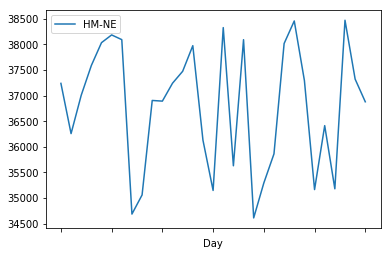

In [60]:
daily.plot('Day', 'HM-NE')

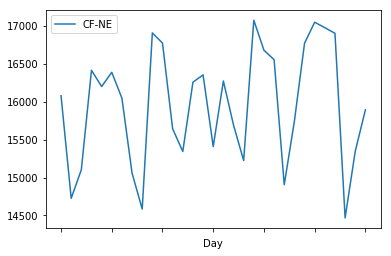

In [61]:
daily.plot('Day', 'CF-NE')

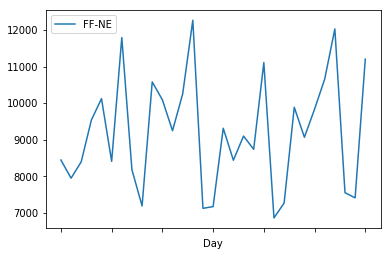

In [62]:
daily.plot('Day', 'FF-NE')

In [98]:
daily['TOTAL-NE'] = daily['HM-NE'] + daily['CF-NE'] + daily['FF-NE']
daily['TOTAL-SE'] = daily['HM-SE'] + daily['CF-SE'] + daily['FF-SE']
daily['TOTAL-NW'] = daily['HM-NW'] + daily['CF-NW'] + daily['FF-NW']
daily['TOTAL-SW'] = daily['HM-SW'] + daily['CF-SW'] + daily['FF-SW']
daily['TOTAL-C'] = daily['HM-C'] + daily['CF-C'] + daily['FF-C']
daily['TOTAL-HM'] = daily['HM-NE'] + daily['HM-NW'] + daily['HM-SE'] + daily['HM-SW'] + daily['HM-C']
daily['TOTAL-CF'] = daily['CF-NE'] + daily['CF-NW'] + daily['CF-SE'] + daily['CF-SW'] + daily['CF-C']
daily['TOTAL-FF'] = daily['FF-NE'] + daily['FF-NW'] + daily['FF-SE'] + daily['FF-SW'] + daily['FF-C']

In [108]:
week = daily[2:9]

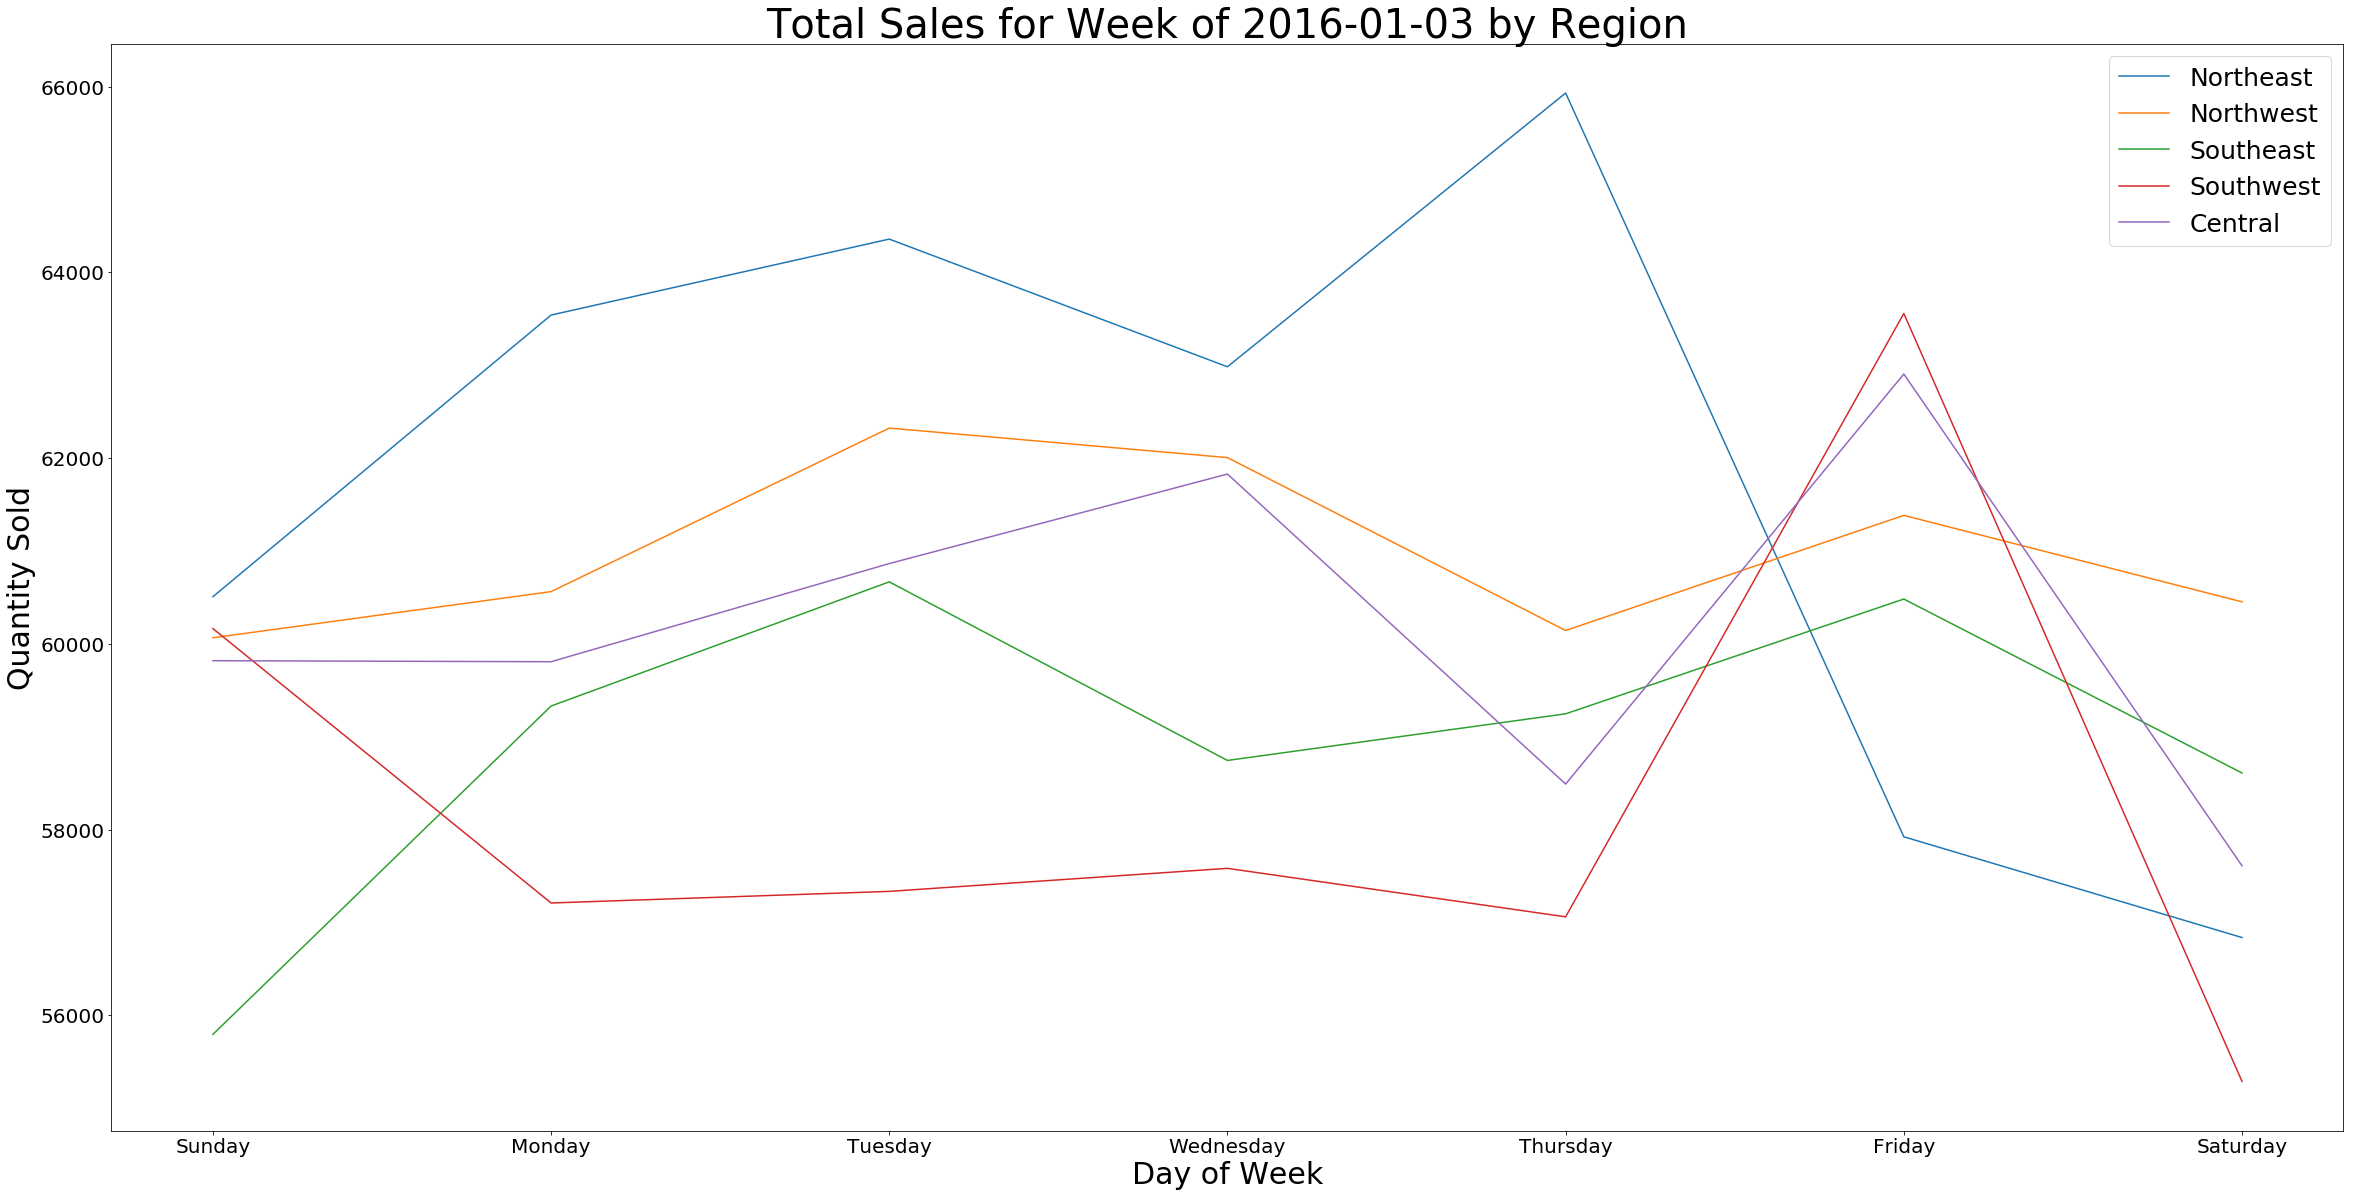

In [172]:
plt.figure(figsize=(40, 20))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.title('Total Sales for Week of 2016-01-03 by Region', fontsize=40)
plt.plot(week['DOW'], week['TOTAL-NE'])
plt.plot(week['DOW'], week['TOTAL-NW'])
plt.plot(week['DOW'], week['TOTAL-SE'])
plt.plot(week['DOW'], week['TOTAL-SW'])
plt.plot(week['DOW'], week['TOTAL-C'])
plt.xlabel('Day of Week', fontsize=30)
plt.ylabel('Quantity Sold', fontsize=30)
plt.legend(['Northeast', 'Northwest', 'Southeast', 'Southwest', 'Central'], prop={'size': 25})
plt.savefig('../views/public/img/week_region.png')

In [94]:
plt.clf()

<Figure size 1080x360 with 0 Axes>

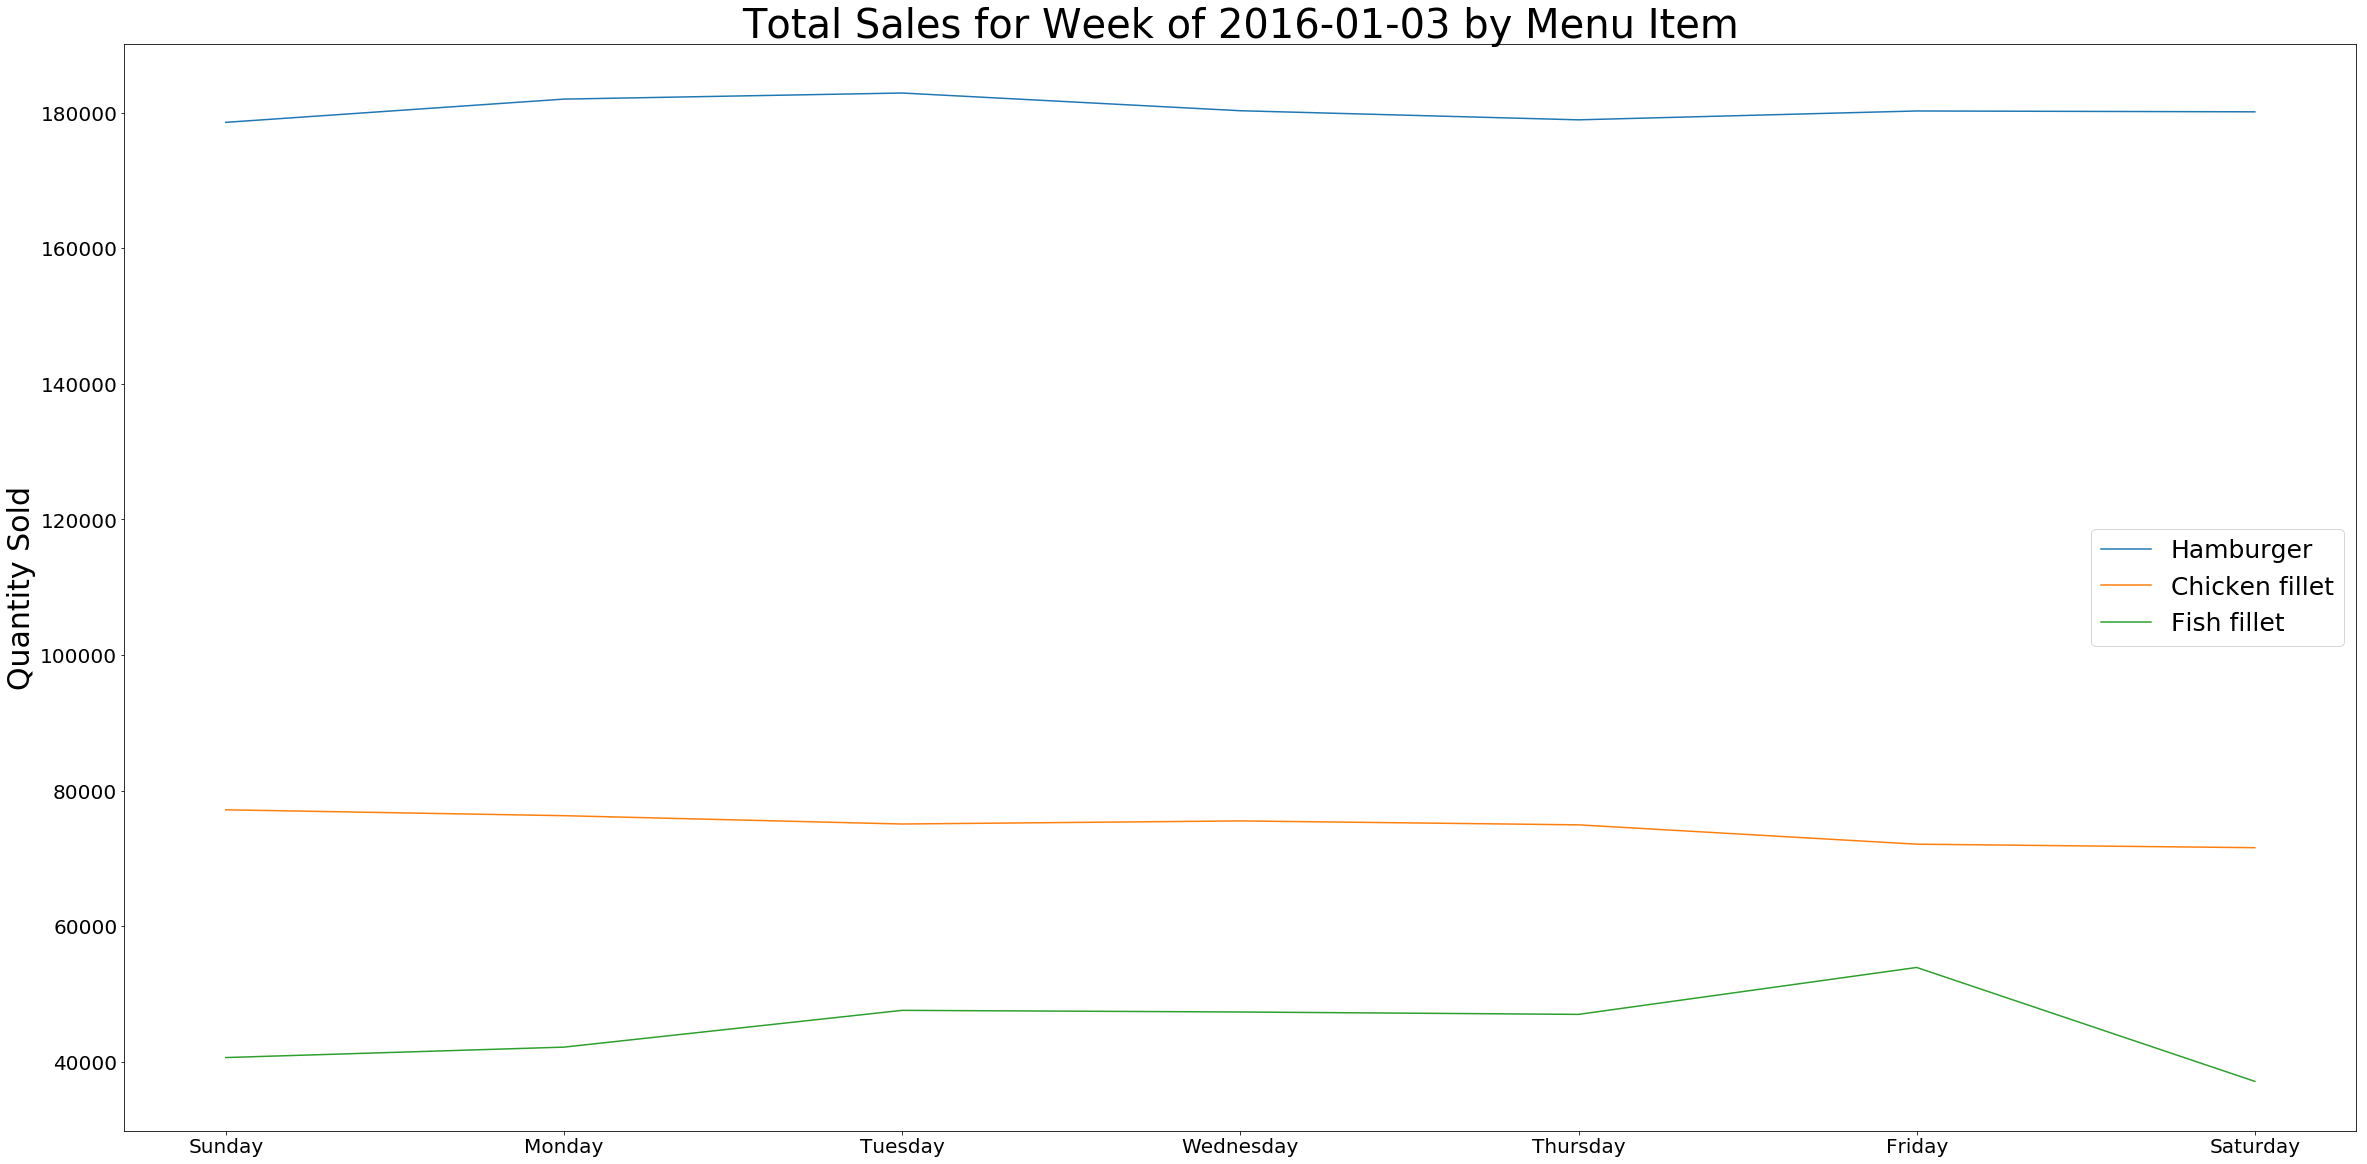

In [171]:
plt.figure(figsize=(40, 20))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.plot(week['DOW'], week['TOTAL-HM'])
plt.plot(week['DOW'], week['TOTAL-CF'])
plt.plot(week['DOW'], week['TOTAL-FF'])
plt.ylabel('Quantity Sold', fontsize=30)
plt.title('Total Sales for Week of 2016-01-03 by Menu Item', fontsize=40)
plt.legend(['Hamburger', 'Chicken fillet', 'Fish fillet'], prop={'size': 25})
plt.savefig('../views/public/img/week_item.png')

In [100]:
plt.clf()

<Figure size 1080x360 with 0 Axes>

In [138]:
monthly['TOTAL-NE'] = monthly['HM-NE'] + monthly['CF-NE'] + monthly['FF-NE']
monthly['TOTAL-SE'] = monthly['HM-SE'] + monthly['CF-SE'] + monthly['FF-SE']
monthly['TOTAL-NW'] = monthly['HM-NW'] + monthly['CF-NW'] + monthly['FF-NW']
monthly['TOTAL-SW'] = monthly['HM-SW'] + monthly['CF-SW'] + monthly['FF-SW']
monthly['TOTAL-C'] = monthly['HM-C'] + monthly['CF-C'] + monthly['FF-C']
monthly['TOTAL-HM'] = monthly['HM-NE'] + monthly['HM-NW'] + monthly['HM-SE'] + monthly['HM-SW'] + monthly['HM-C']
monthly['TOTAL-CF'] = monthly['CF-NE'] + monthly['CF-NW'] + monthly['CF-SE'] + monthly['CF-SW'] + monthly['CF-C']
monthly['TOTAL-FF'] = monthly['FF-NE'] + monthly['FF-NW'] + monthly['FF-SE'] + monthly['FF-SW'] + monthly['FF-C']
monthly['TOTAL'] = monthly['TOTAL-HM'] + monthly['TOTAL-CF'] + monthly['TOTAL-FF']

In [128]:
monthly.head()

,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,...,CF-C,FF-C,TOTAL-NE,TOTAL-SE,TOTAL-NW,TOTAL-SW,TOTAL-C,TOTAL-HM,TOTAL-CF,TOTAL-FF
0,Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,...,450958,281619,1920995,1825056,1871601,1874274,1859053,5598648,2352671,1399660
1,Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,...,462115,288586,1959215,1933574,1960649,1969544,1859777,5840210,2394392,1448157
2,Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,...,486622,280523,2027678,1901402,1939014,2022124,1935039,5909899,2461847,1453511
3,Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,...,465233,290533,1997833,1908892,1946570,1990964,1872326,5799715,2455722,1461148
4,May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,...,481505,300695,2108274,2013220,1979297,2082809,1937812,6080407,2533501,1507504


In [146]:
def getLabel(val):
    return val[:3] + val[-2:]
monthly['Label'] = monthly['Month, Year'].apply(getLabel)

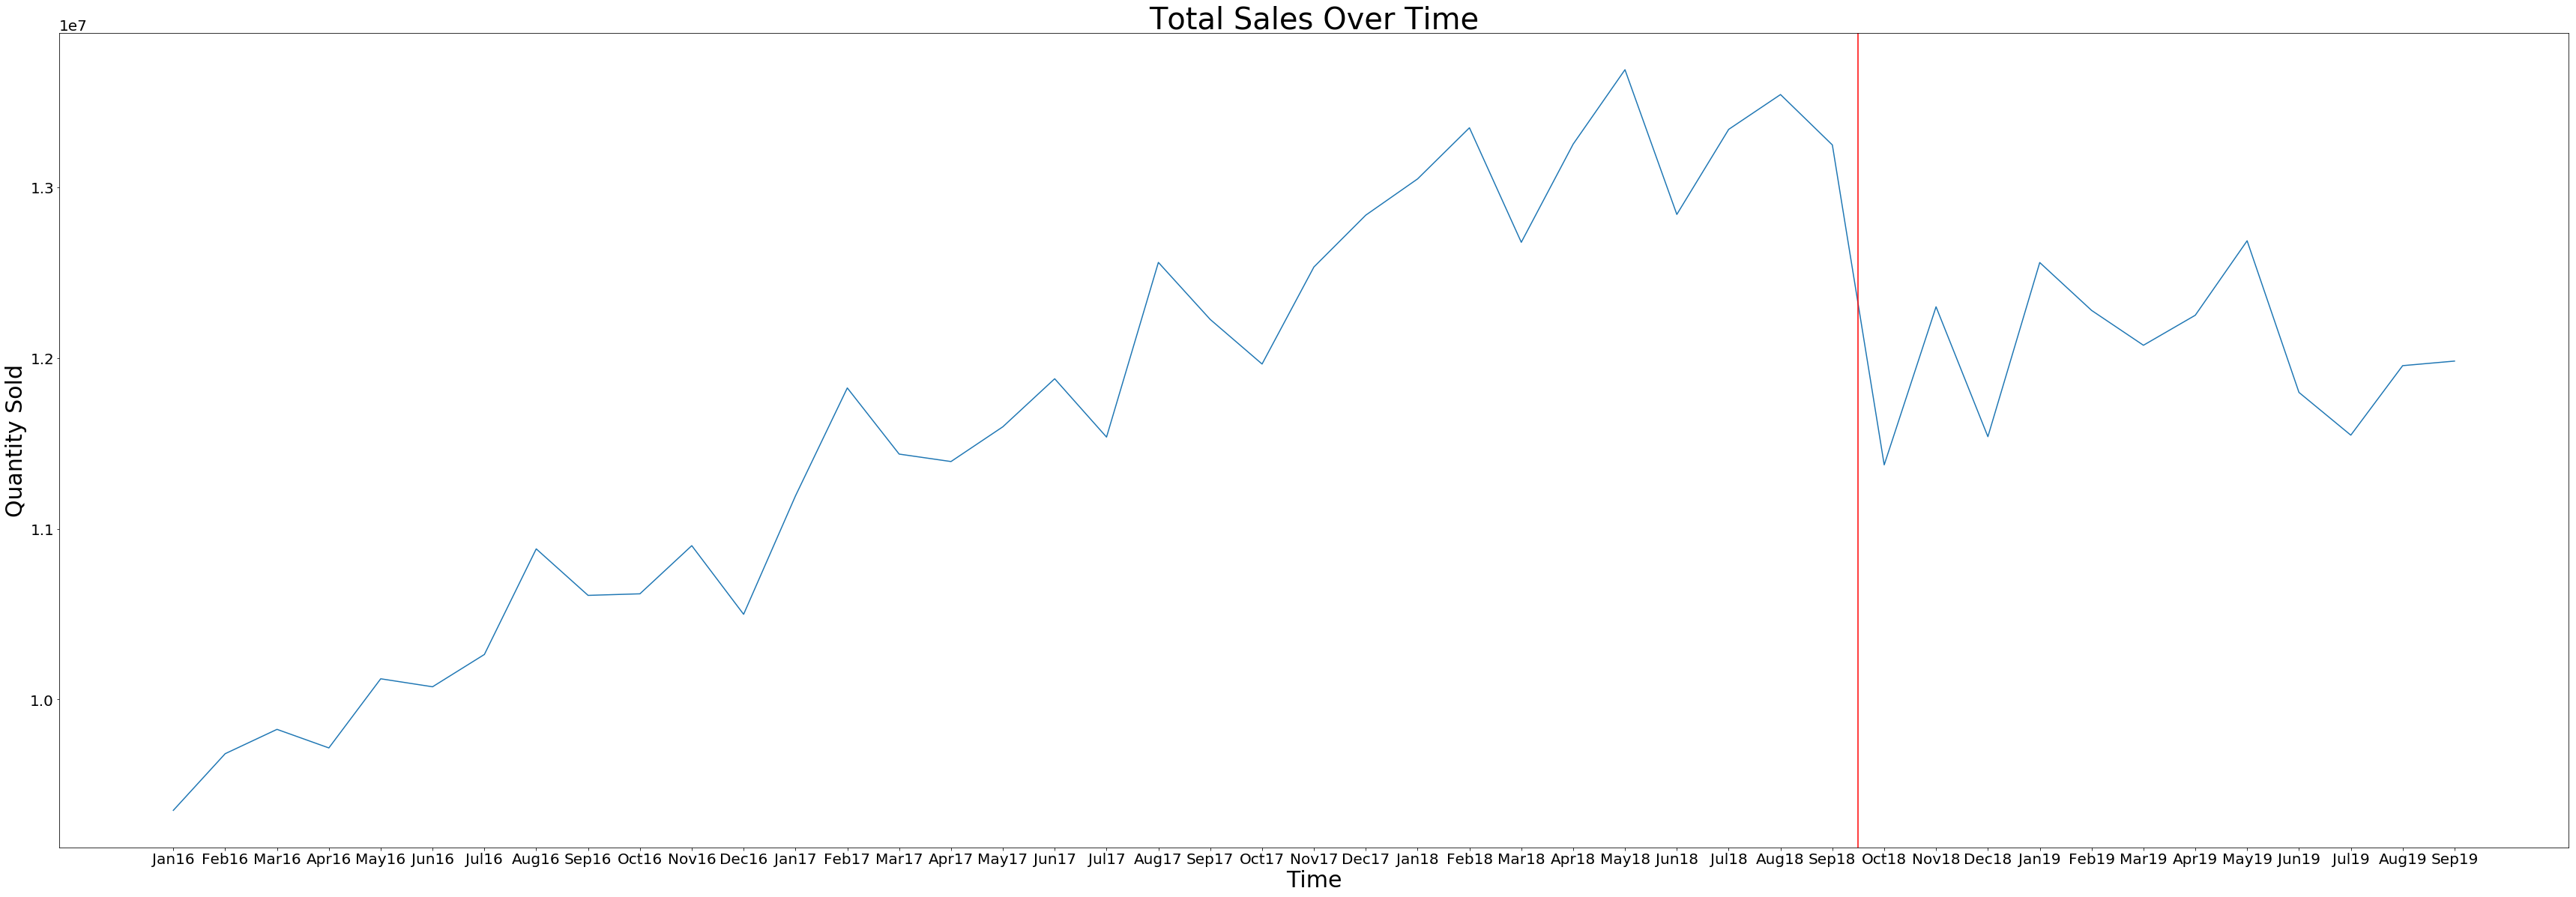

In [188]:
plt.figure(figsize=(60, 20))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.title('Total Sales Over Time', fontsize=40 )
plt.plot(monthly['Label'], monthly['TOTAL'])
plt.axvline(x=32.5, color='red')
plt.xlabel('Time', fontsize=30)
plt.ylabel('Quantity Sold', fontsize=30)
plt.savefig('../views/public/img/total_over_time.png')

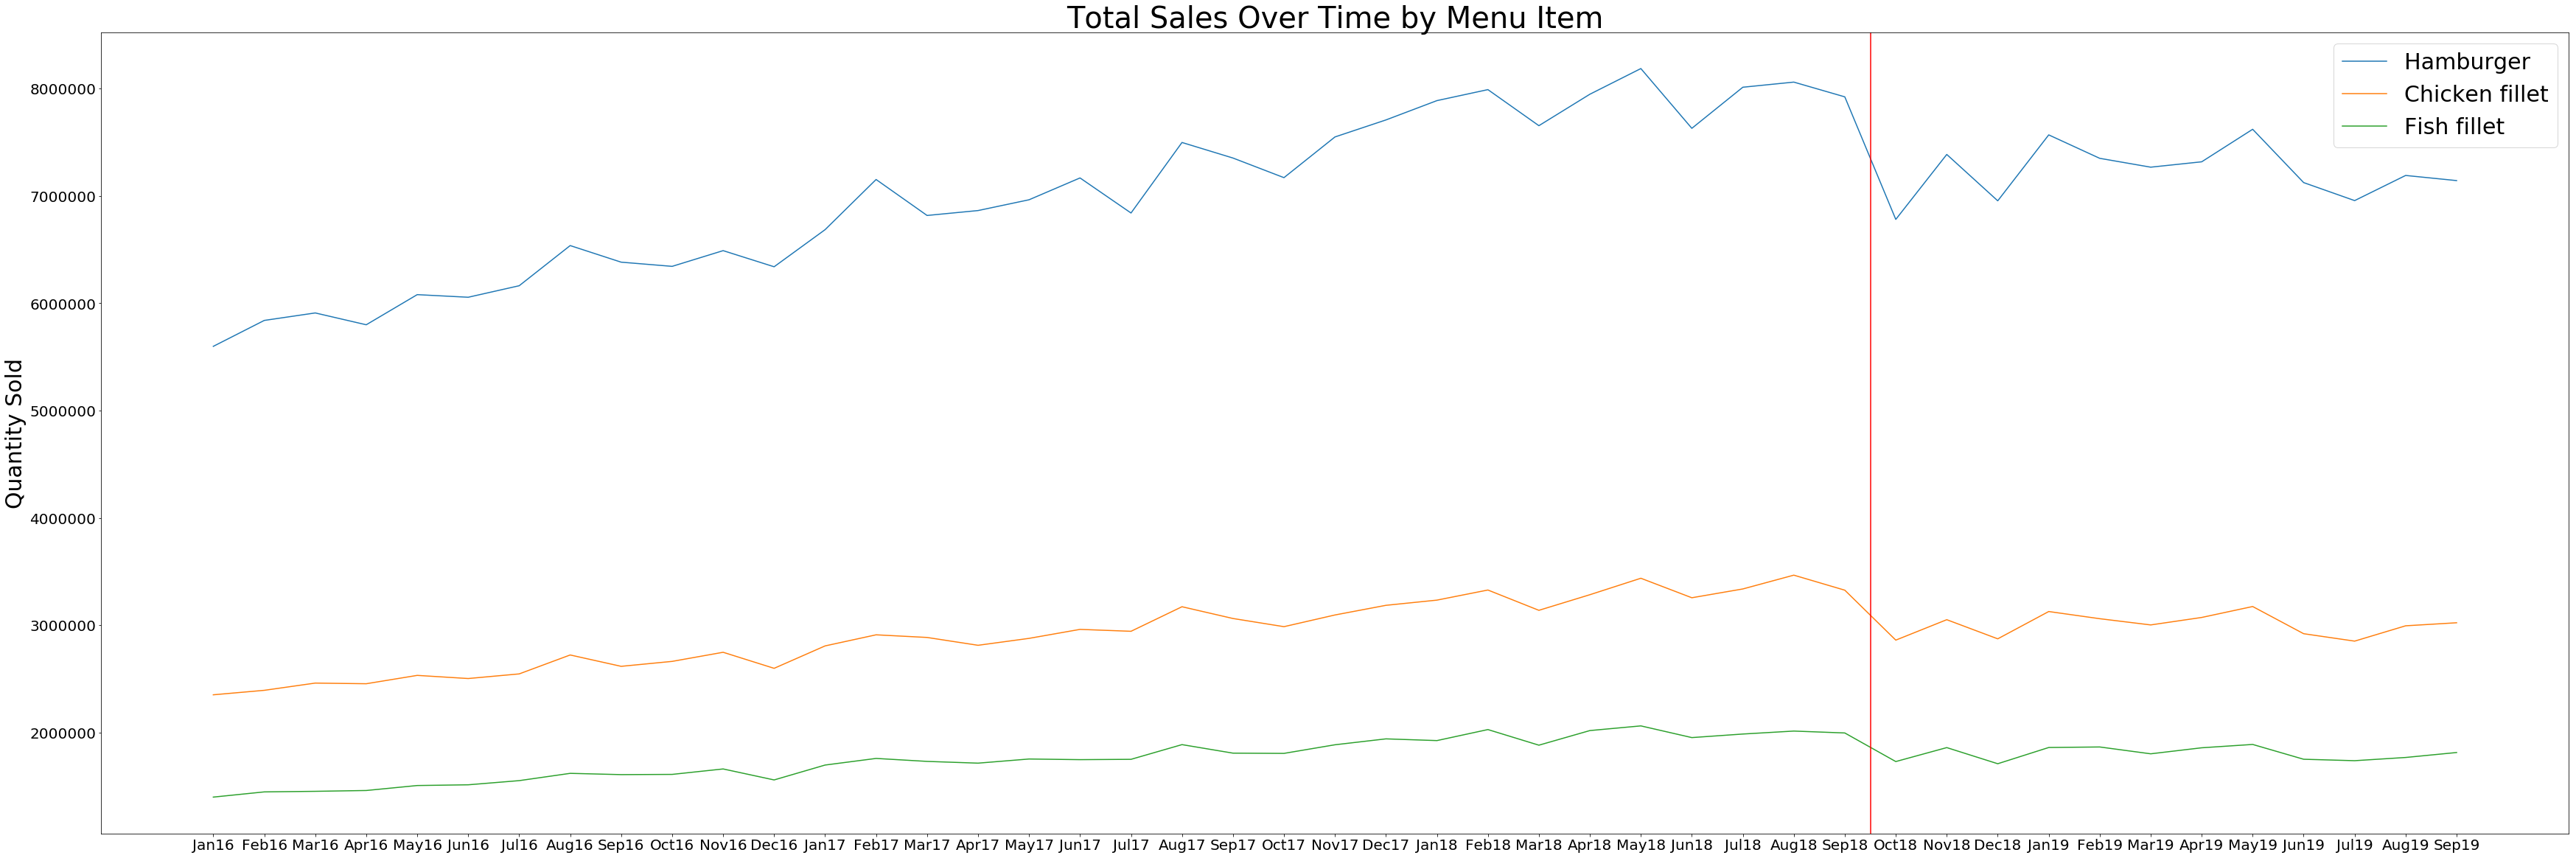

In [184]:
plt.figure(figsize=(60, 20))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.plot(monthly['Label'], monthly['TOTAL-HM'])
plt.plot(monthly['Label'], monthly['TOTAL-CF'])
plt.plot(monthly['Label'], monthly['TOTAL-FF'])
plt.axvline(x=32.5, color='red')
plt.ylabel('Quantity Sold', fontsize=30)
plt.title('Total Sales Over Time by Menu Item', fontsize=40)
plt.legend(['Hamburger', 'Chicken fillet', 'Fish fillet'], prop={'size': 30})
plt.savefig('../views/public/img/items_over_time.png')

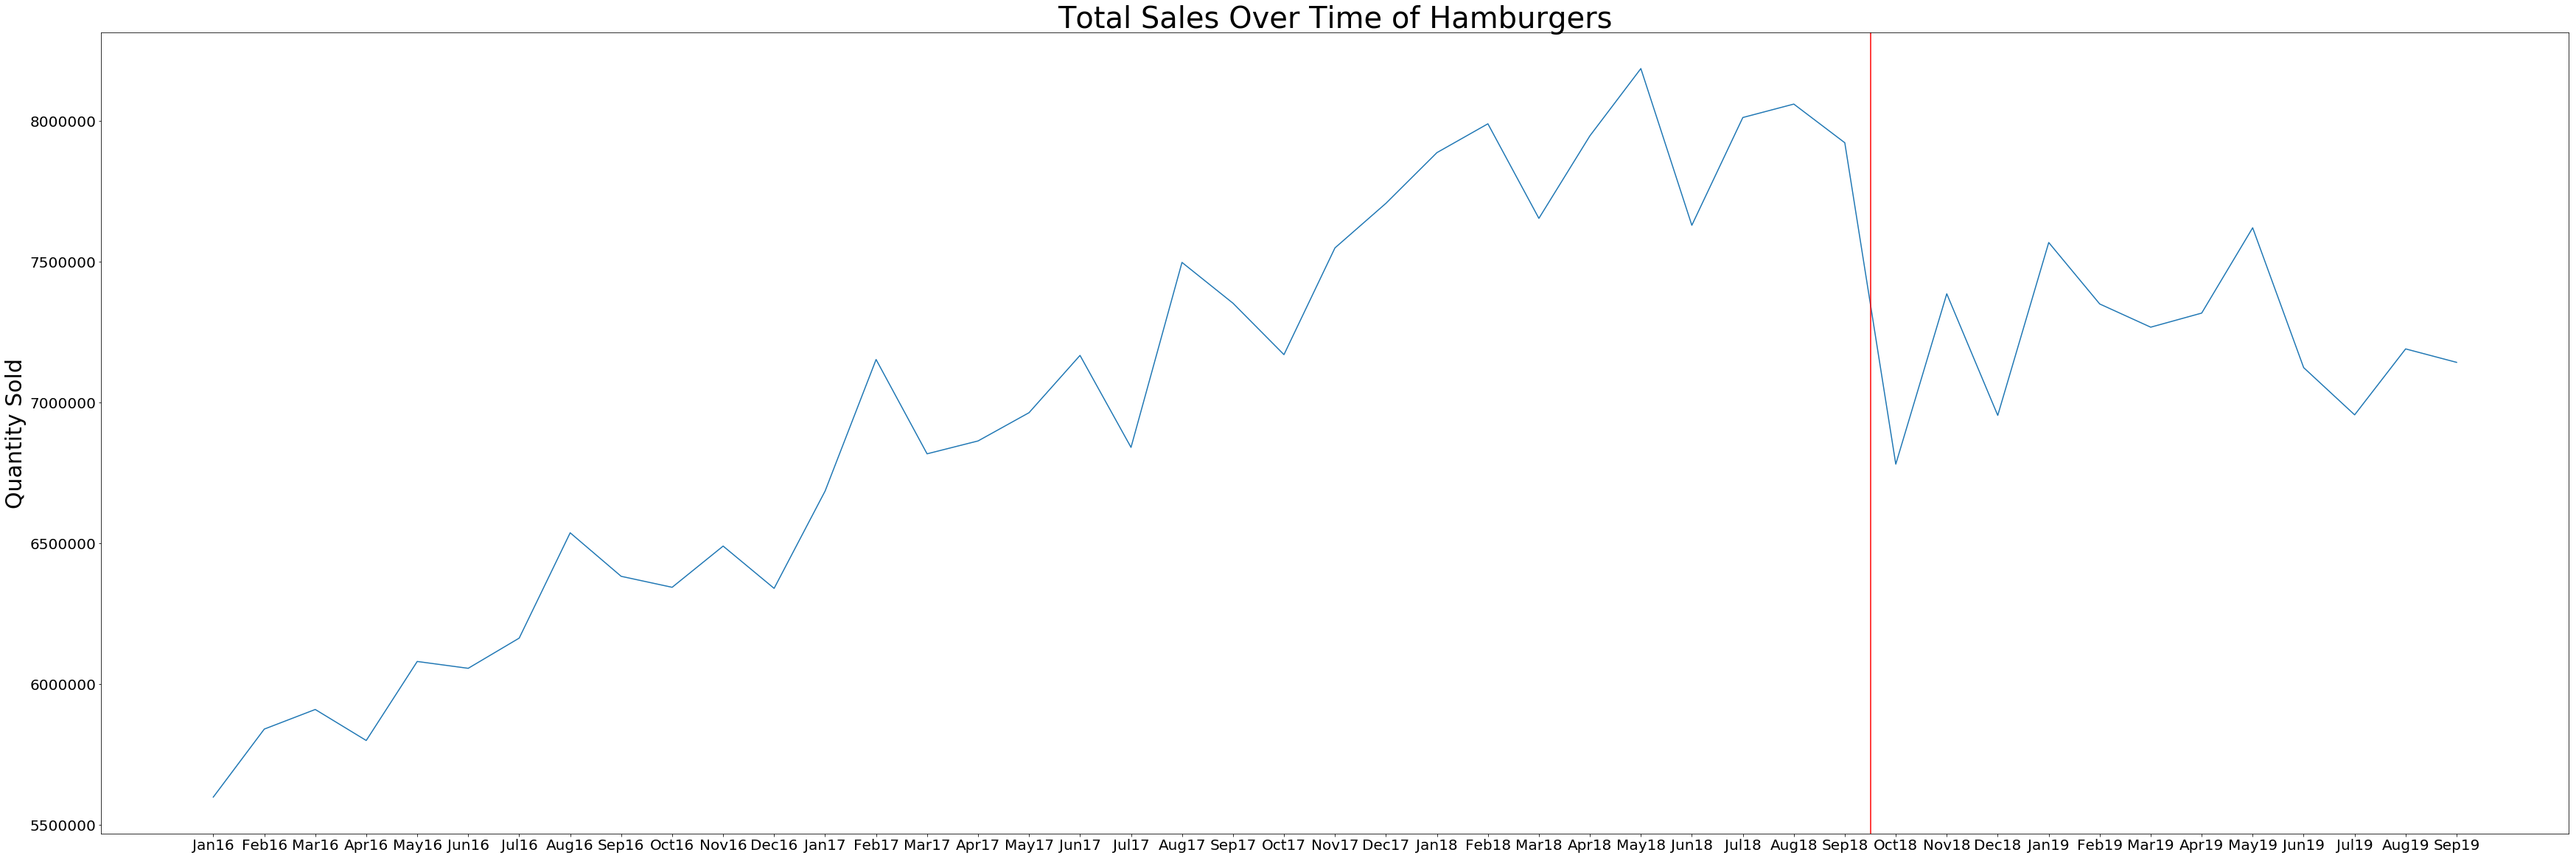

In [185]:
plt.figure(figsize=(60, 20))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.plot(monthly['Label'], monthly['TOTAL-HM'])
plt.axvline(x=32.5, color='red')
plt.ylabel('Quantity Sold', fontsize=30)
plt.title('Total Sales Over Time of Hamburgers', fontsize=40)
plt.savefig('../views/public/img/hamburgers_over_time.png')

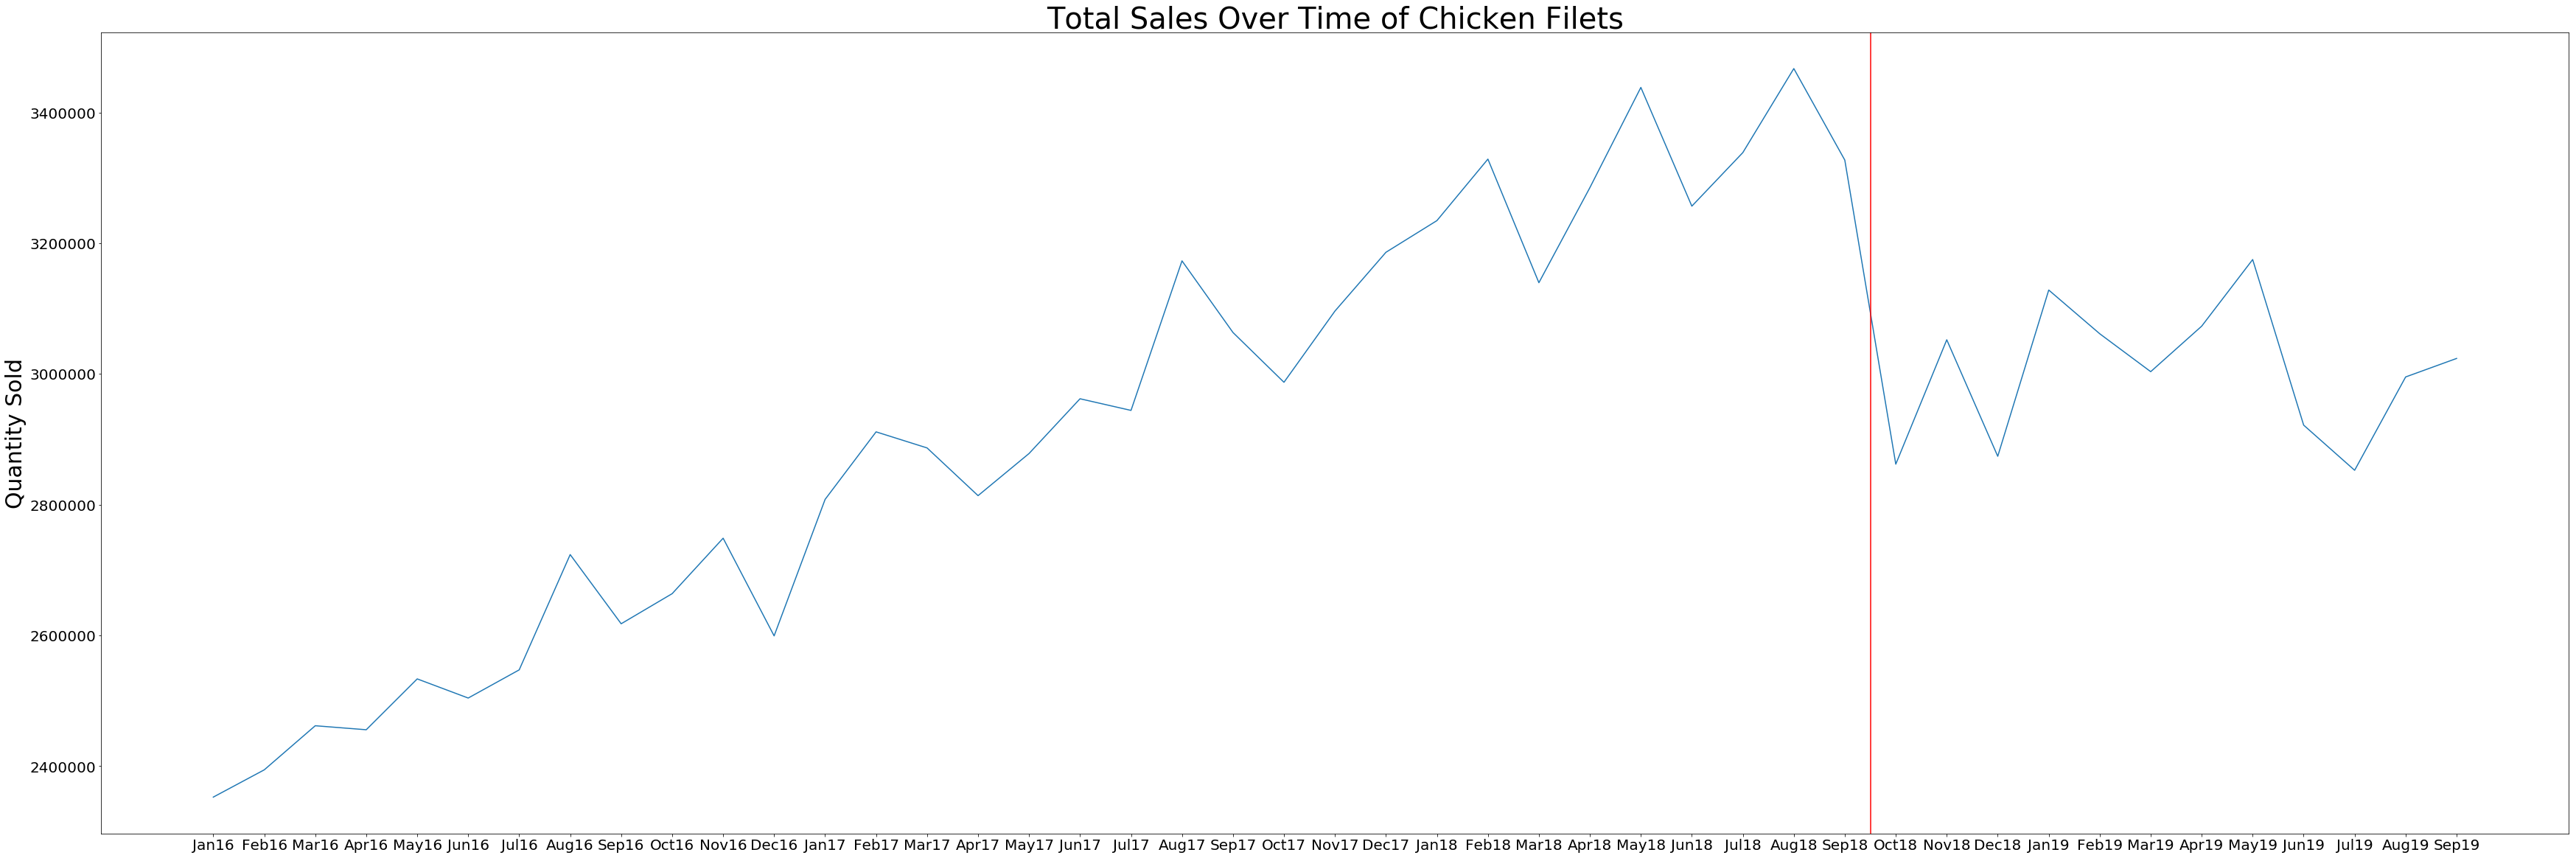

In [186]:
plt.figure(figsize=(60, 20))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.plot(monthly['Label'], monthly['TOTAL-CF'])
plt.axvline(x=32.5, color='red')
plt.ylabel('Quantity Sold', fontsize=30)
plt.title('Total Sales Over Time of Chicken Filets', fontsize=40)
plt.savefig('../views/public/img/cfs_over_time.png')

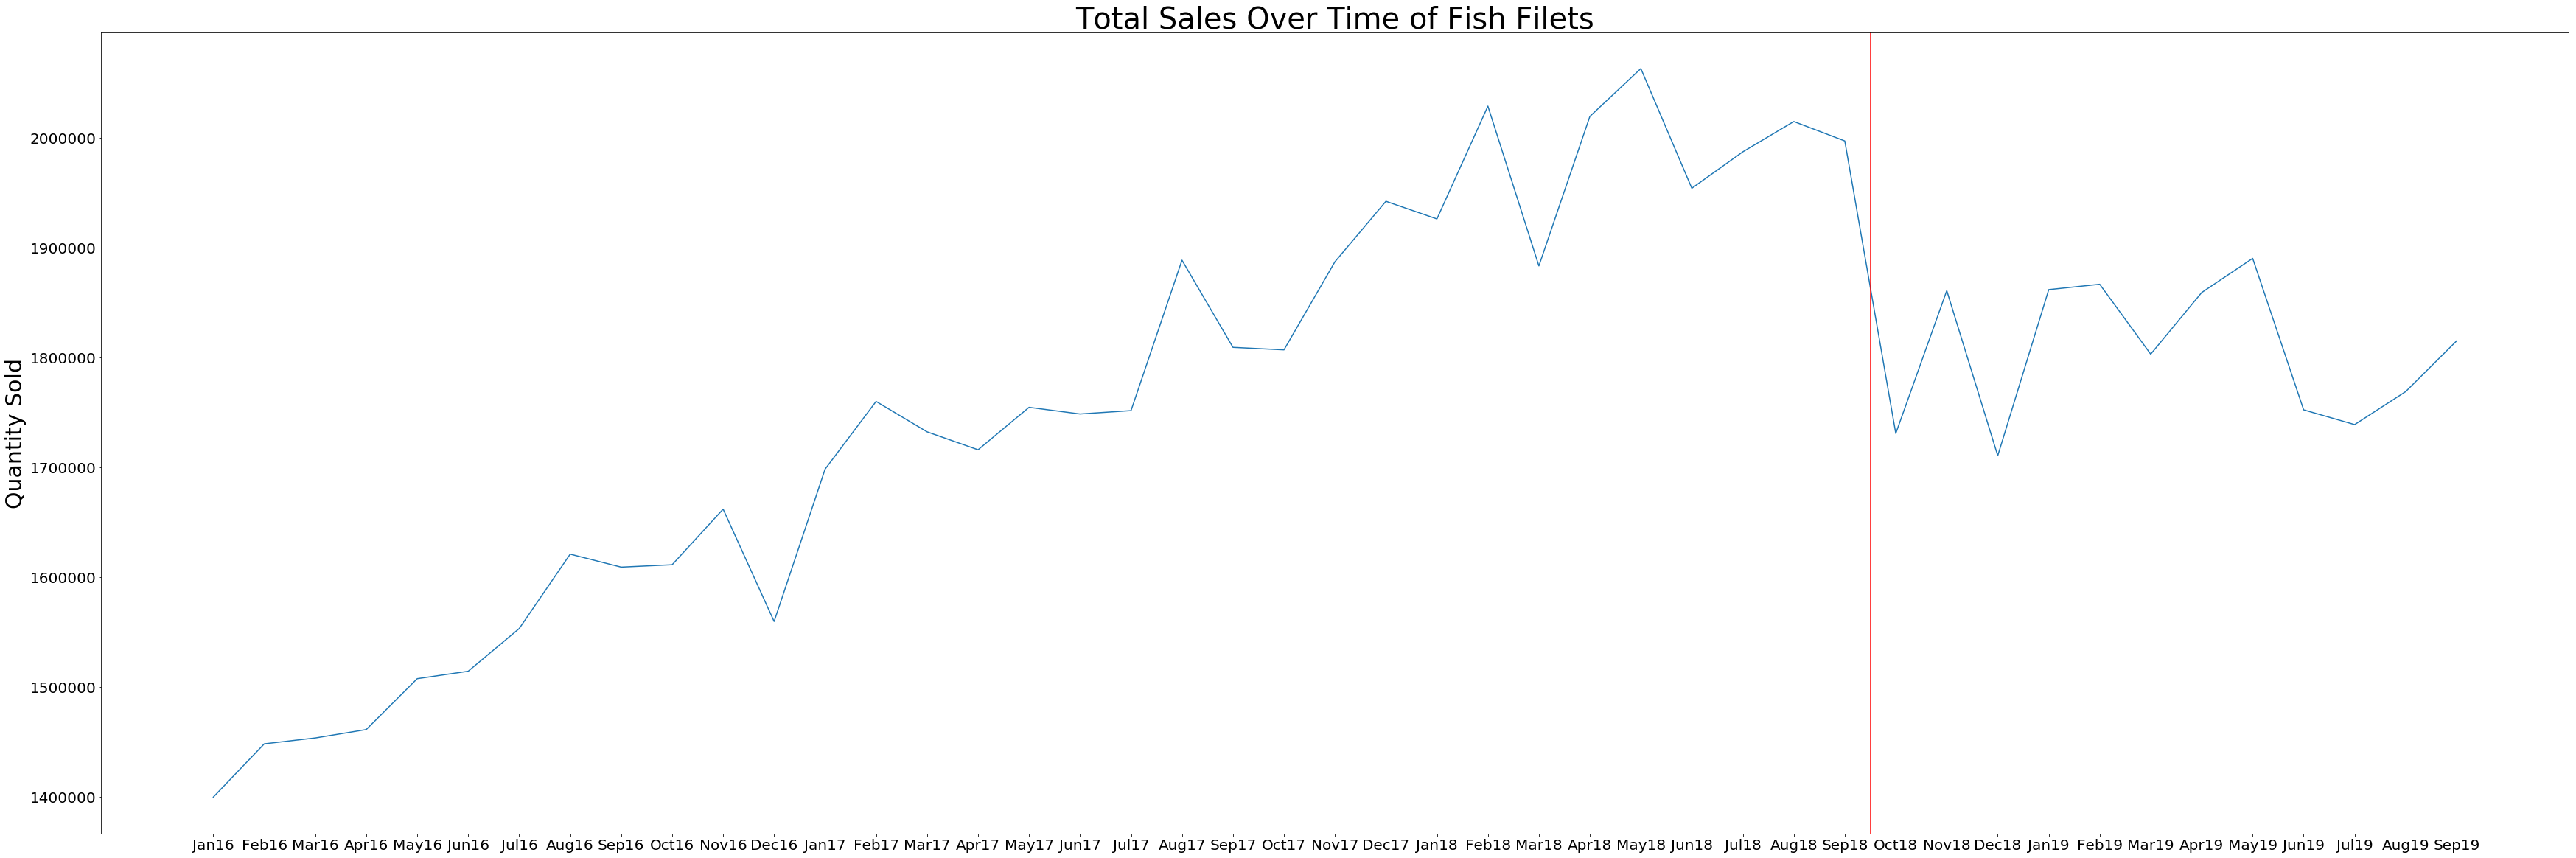

In [187]:
plt.figure(figsize=(60, 20))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.plot(monthly['Label'], monthly['TOTAL-FF'])
plt.axvline(x=32.5, color='red')
plt.ylabel('Quantity Sold', fontsize=30)
plt.title('Total Sales Over Time by Region', fontsize=40)
plt.savefig('../views/public/img/ffs_over_time.png')

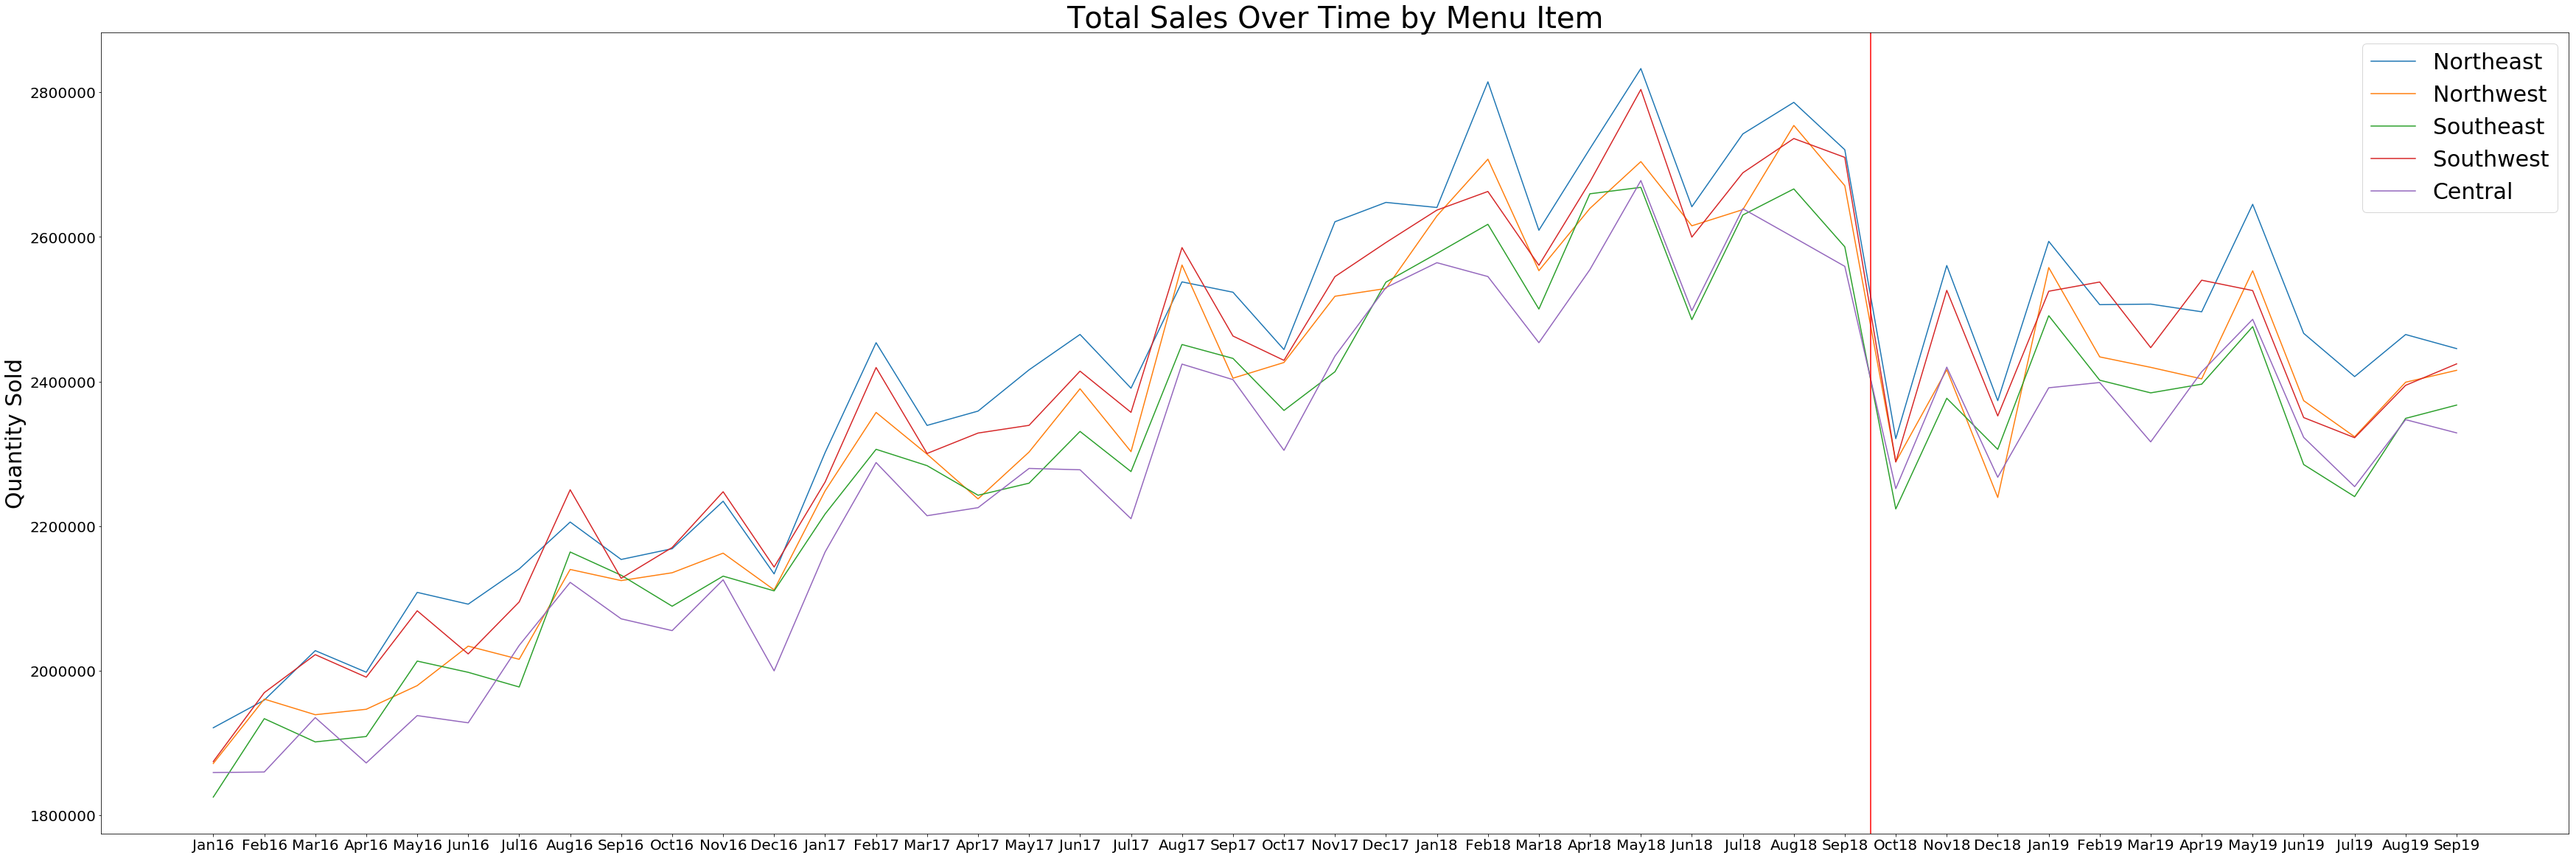

In [191]:
plt.figure(figsize=(60, 20))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.plot(monthly['Label'], monthly['TOTAL-NE'])
plt.plot(monthly['Label'], monthly['TOTAL-NW'])
plt.plot(monthly['Label'], monthly['TOTAL-SE'])
plt.plot(monthly['Label'], monthly['TOTAL-SW'])
plt.plot(monthly['Label'], monthly['TOTAL-C'])
plt.axvline(x=32.5, color='red')
plt.legend(['Northeast', 'Northwest', 'Southeast', 'Southwest', 'Central'], prop={'size': 30})
plt.ylabel('Quantity Sold', fontsize=30)
plt.title('Total Sales Over Time by Menu Item', fontsize=40)
plt.savefig('../views/public/img/total_over_time_by_region.png')